#### 1-2. Create a new empty Jupyter Notebook and import modules that are required 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### 3)Read the height_mass.csv file into a Pandas DataSet called: people
##### ◦ Use the pandas read_csv method

In [2]:
# import the height_mass.csv
people = pd.read_csv('height_mass.csv')
people

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


#### 4. Use a Seaborn histplot to show the distribution for Mass

Text(0.5, 1.0, '5 Bins Distribution of Mass')

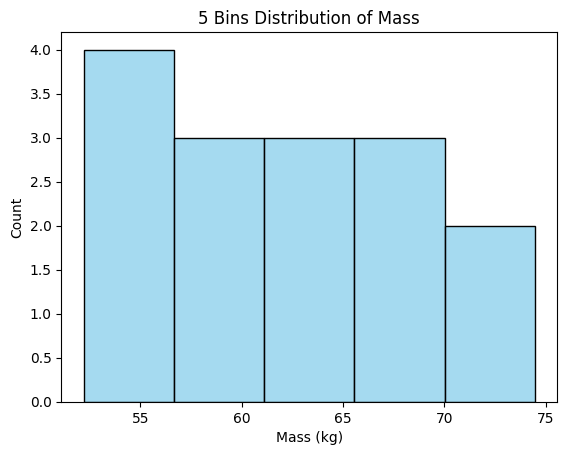

In [3]:
# Created a Seaborn histplot for Mass with different bin numbers
# We started with 5 bins 
sns.histplot(data=people, x='Mass (kg)', bins=5, color='skyblue', edgecolor='black')
plt.title("5 Bins Distribution of Mass")

Text(0.5, 1.0, '6 Bins Distribution of Mass')

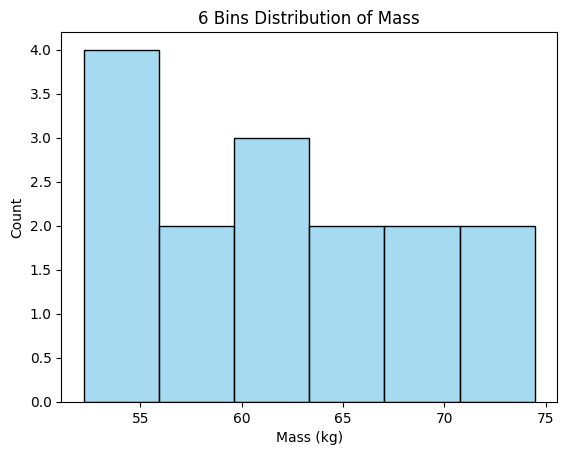

In [4]:
# Created a Seaborn histplot for Mass with 6 bin number
sns.histplot(data=people, x='Mass (kg)', bins=6, color='skyblue', edgecolor='black')
plt.title("6 Bins Distribution of Mass")

Text(0.5, 1.0, '7 Bins Distribution of Mass')

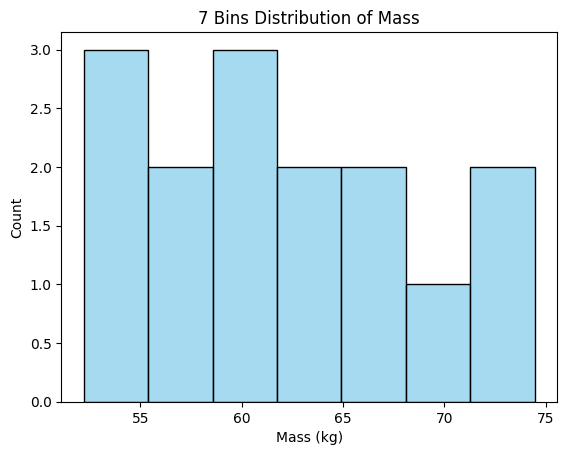

In [5]:
# Created a Seaborn histplot for Mass with 7 bin number
sns.histplot(data=people, x='Mass (kg)', bins=7, color='skyblue', edgecolor='black')
plt.title("7 Bins Distribution of Mass")

**Observation for distribution of mass** After experimenting with different bin sizes, we came to a conclusion that using 5 bins is the most optimal. 5 bins seems to strike the best balance providing clear information about the data distrubution. The distribution appears to be Right-Skewed, Most people weigh less, with fewer heavy individuals. The mean also appears to be higher than the median, the peak is towards the left side of the distribution. 

#### 5. Use a Seaborn histplot to show the distribution for Height

Text(0.5, 1.0, '5 Bins Distribution of Height')

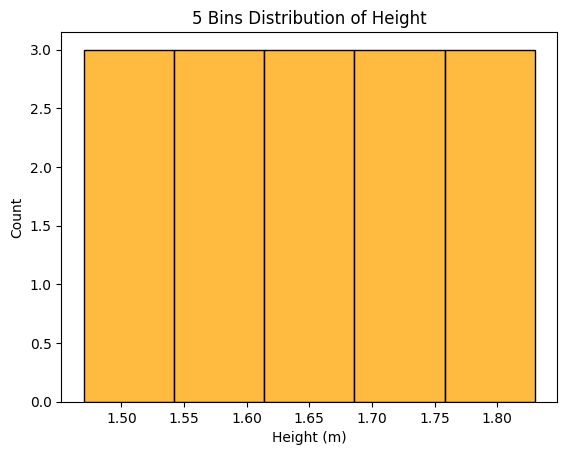

In [6]:
# Created a Seaborn histplot for Height with 5 bin number
sns.histplot(data=people, x='Height (m)', bins=5, color='orange', edgecolor='black')
plt.title("5 Bins Distribution of Height")

Text(0.5, 1.0, '6 Bins Distribution of Height')

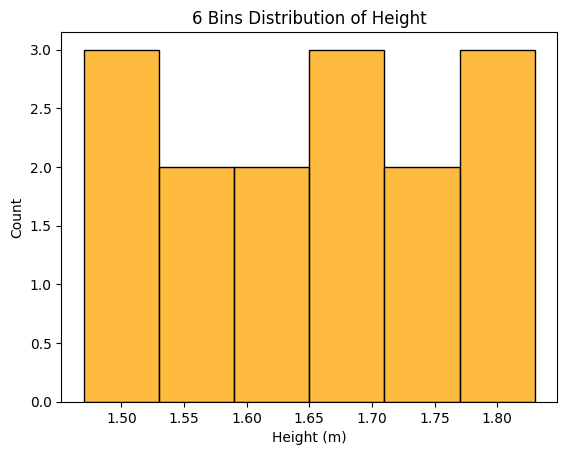

In [7]:
# Created a Seaborn histplot for Height with 6 bin number
sns.histplot(data=people, x='Height (m)', bins=6, color='orange', edgecolor='black')
plt.title("6 Bins Distribution of Height")

Text(0.5, 1.0, '7 Bins Distribution of Height')

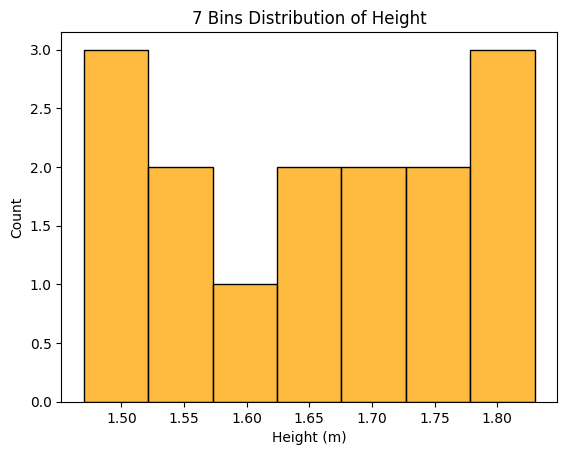

In [8]:
# Created a Seaborn histplot for Height with 7 bin number
sns.histplot(data=people, x='Height (m)', bins=7, color='orange', edgecolor='black')
plt.title("7 Bins Distribution of Height")

**Observation:**

After comparing histograms with different bin sizes, a bin count of 7 was found to be the most informative for this dataset. Bin size 5 oversimplified the data, presenting a uniform distribution which did not capture the essential details of the dataset's structure. On the other hand, a bin size of 6 suggested a multimodal distribution, indicating the presence of multiple modes. Increasing the bin count to 7 refined our understanding, revealing a clear bimodal distribution. This was somewhat unexpected since height data often tends to follow a normal distribution, yet in this case, we observed two distinct modes — one representing shorter heights and the other taller heights, with no evident skewness to the distribution.

This optimal bin size of 7 allows us to see the full complexity of the data, highlighting that there are significant numbers of individuals at both extremes.

#### 6.Use a Seaborn jointplot to plot x=Height, y=Mass

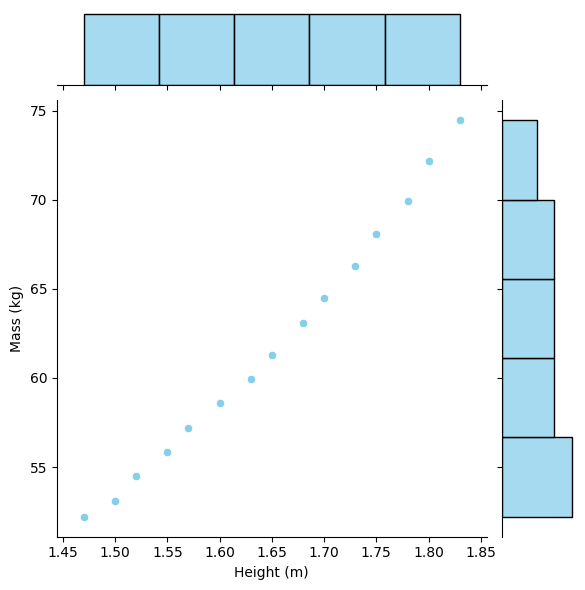

In [22]:
# Create a Seaborn jointplot
sns.jointplot(x="Height (m)", y="Mass (kg)", data=people, kind="scatter", color="skyblue")

**Observation:** The Seaborn jointplot, which plots height on the x-axis against mass on the y-axis, reinforces the patterns observed in the individual histograms. The scatter plot portion of the jointplot reveals a trend where as one variable increases, the other tends to increase as well, indicating a positive correlation between height and mass. This means in our dataset, taller individuals generally have a higher mass.

The histograms for height and mass — the former with seven bins and the latter with six — allow us to examine the distribution of each variable separately. The height distribution's bimodal nature, with two peaks, suggests two groups within the population based on height. In contrast, the mass distribution appears slightly left-skewed, with more individuals having a lower mass, and fewer as the mass increases.

In machine learning, understanding the shape and spread of your data can impact how you preprocess the data, choose your models, and interpret your results. The spread of the points in the scatter plot indicates that while height is a good indicator of mass, it’s not the only factor, as the points are not aligned perfectly along a line but show some variability. This suggests that other variables, not shown on this plot, may also influence an individual’s mass.

#### 7. Split the data into training and testing data, using appropriate variable names.

In [23]:
# contains all columns of the DataFrame people except for 'Mass (kg)'.
x = people.drop(columns=['Mass (kg)'])

# contains only the 'Mass (kg)' column from the DataFrame people.
y = people['Mass (kg)']

In [24]:
# imported the train_test_split to use to split the data
from sklearn.model_selection import train_test_split

In [25]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### 8. Create the model and fit it to the training data.

In [26]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 9. Predict values based on testing data

In [27]:
# Predict values based on the testing data
prediction = model.predict(x_test)
prediction

array([60.90951511, 62.13730604, 54.15666497])

#### 10.Print out error metrics:


In [28]:
from sklearn import metrics

In [29]:
# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, prediction)

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, prediction)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))

# Print out the error metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE):{mse}")
print(f"Root Mean Squared Error (RMSE):{rmse}")

Mean Absolute Error (MAE): 0.7167187287328147
Mean Squared Error (MSE):0.5939743076200388
Root Mean Squared Error (RMSE):0.7706972866307749


#### 11. Predict some specific mass. Choose any height directly from the data, predict the weight for that height, and see whether the prediction is close to reality.


In [30]:
# Choose a specific height from the data
predict_height = [[1.68]]

# Predict the weight for the specific height using the trained model
predicted_weight = model.predict(predict_height)

# Predict the mass for the specific height
actual_weight = people.loc[people['Height (m)'] == 1.68, 'Mass (kg)'].values

In [31]:
# Display the output of predicted_weight, actual_weight and rmse
print(f"Weight predicted for 1.68m height: {predicted_weight}")
print(f"Actual weight for 1.68m height: {actual_weight}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Weight predicted for 1.68m height: [63.97899245]
Actual weight for 1.68m height: [63.11]
Root Mean Squared Error (RMSE): 0.7706972866307749


**Observation** The regression model has predicted a weight of approximately 63.76 kilograms for an individual with a height of 1.68 meters. Comparing this with the actual weight recorded in the dataset for the same height, which is 63.11 kilograms, we observe that the model's prediction is very close, with a difference of only about 0.65 kilograms.The RMSE of approximately 0.706 kg for the model’s weight predictions signifies high accuracy, with average prediction errors under a kilogram. This suggests that the model reliably predicts weight from height.

#### 12.Use seaborn to display an lmplot with the linear regression line shown (fit_reg=True)

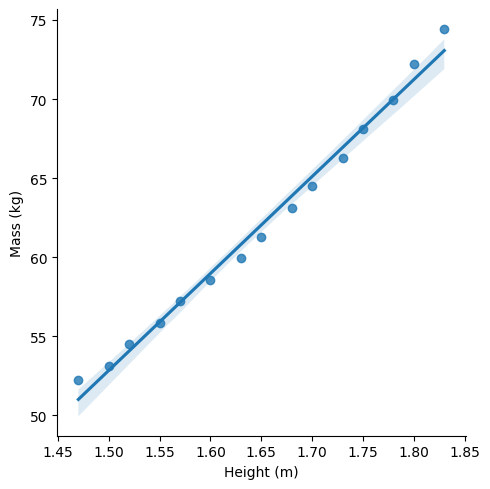

In [32]:
# Create the lmplot
sns.lmplot(x="Height (m)", y="Mass (kg)", data=people, fit_reg=True)

**Observation** The scatter plot with the fitted linear regression line clearly illustrates a direct and positive link between height and mass. Data points cluster around the line, showing a strong correlation: as people get taller, their weight tends to increase. This visualization quantifies the relationship, consistent with the earlier observation from task #6.

The closeness of data points to the line emphasizes the strength of the connection between height and mass. The low RMSE value highlights the accuracy of this trend in predicting weight based on height.

In summary, this plot not only aligns with but also strengthens the previous observation regarding the positive correlation between mass and height. The added regression line provides a precise depiction of this trend.